In [1]:
from crismy.crismy import CRISM
from crismy.utils import utils
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

ModuleNotFoundError: No module named 'pvl'

In [4]:
from scipy.signal import *

In [5]:
f = '/Users/andrew/Dropbox/Planetary/CRISM_Project/crism_data/hsp00017ba0_01_ra218l_trr3.img'
hsp = CRISM.open(f)


<Figure size 2160x2880 with 0 Axes>

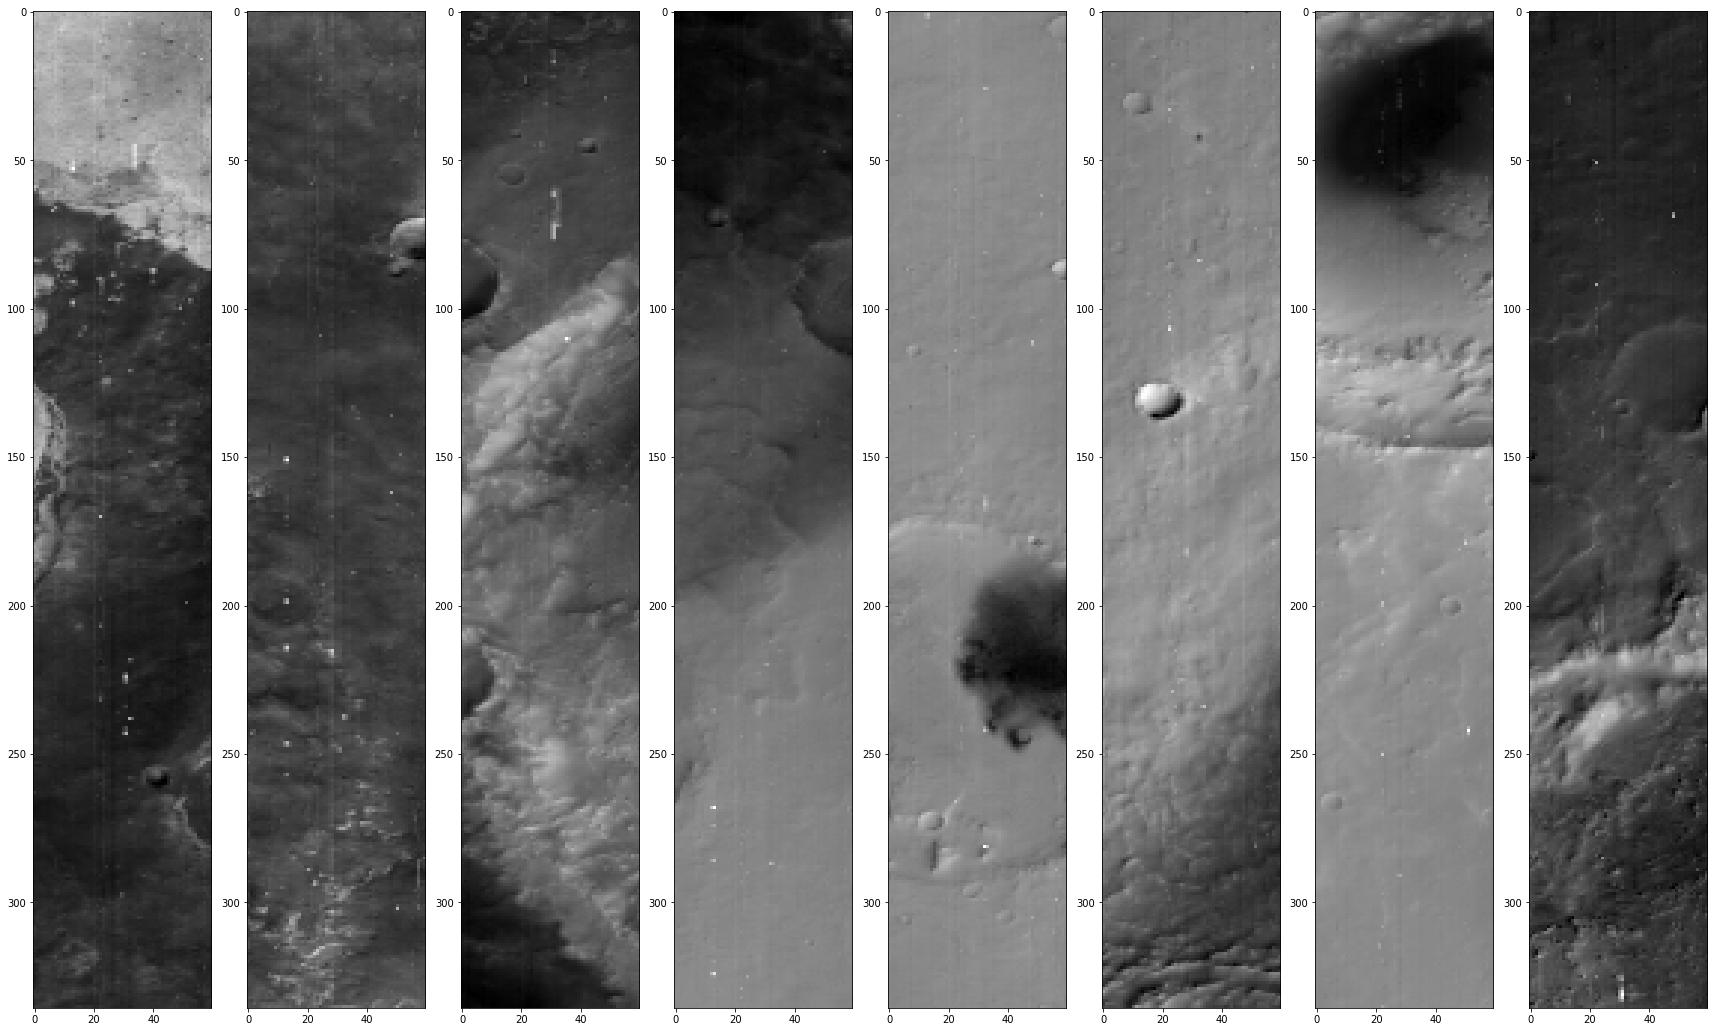

In [6]:
plt.figure(figsize=(30,40))
utils.view_hsp(hsp, 75, cols=8);

In [10]:
subset = hsp[1:,0:64,:]

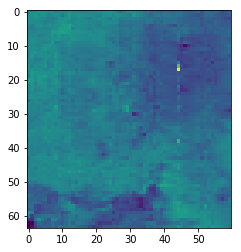

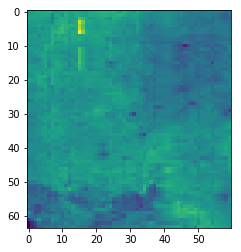

In [15]:
plt.imshow(subset[20])
plt.show()
plt.imshow(subset[80])
plt.show()

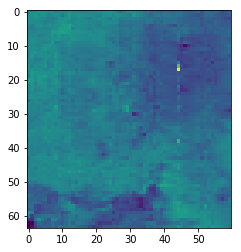

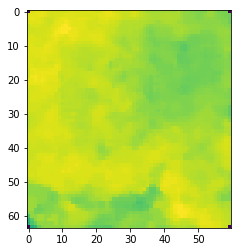

In [27]:
plt.imshow(subset[20])
plt.show()
plt.imshow(medfilt2d(subset[20],3))

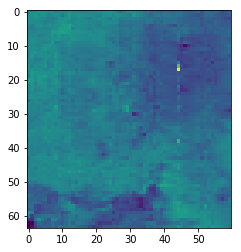

/Users/andrew/.local/share/virtualenvs/crismy/lib/python3.7/site-packages/scipy/signal/signaltools.py:491: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return x[reverse].conj()


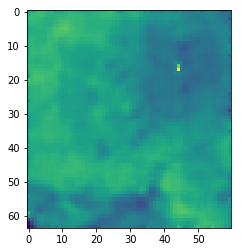

In [30]:
plt.imshow(subset[20])
plt.show()
plt.imshow(wiener(subset[20],3))

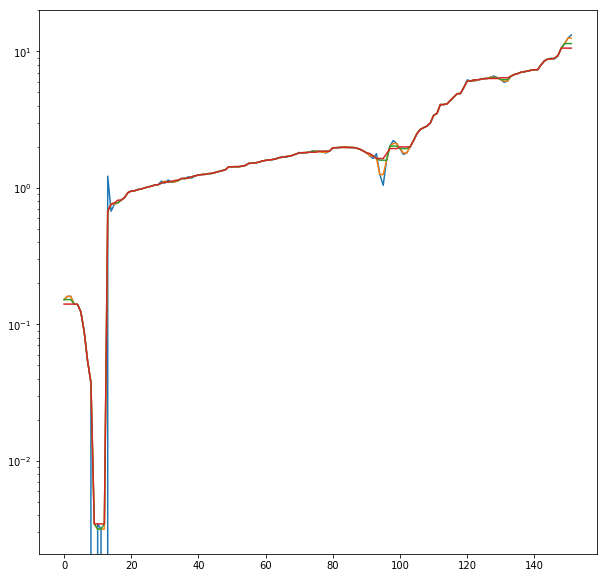

In [54]:
plt.figure(figsize=(10,10))
plt.semilogy(subset[1:,0,0])
plt.semilogy(medfilt(subset[1:,0,0],3))
plt.semilogy(medfilt(subset[1:,0,0],5))
plt.semilogy(medfilt(subset[1:,0,0],7))

In [55]:
subset.shape

(153, 64, 60)

In [62]:
plt.imshow(hsp_color(subset))

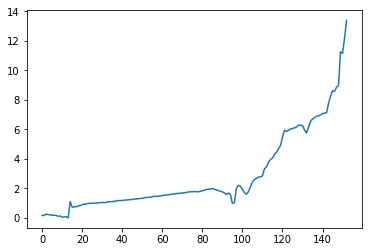

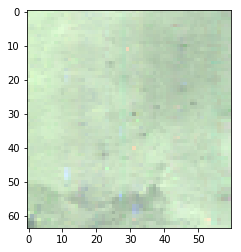

In [75]:
m_subset = np.copy(subset)
for x, y in zip(range(64), range(60)):
    m_subset[:,x,y] = medfilt(subset[:,x,y],5)
plt.plot(subset[:,10,10])
plt.show()
plt.plot(detrend(subset[:,10,10])-detrend(m_subset[:,10,10]))
plt.show()
plt.imshow(hsp_color(m_subset))
plt.show()


In [16]:
m_subset = medfilt(subset, 5)

In [36]:
def normalize(x):
    return x / x.max(axis=0).max(axis=0)

In [39]:
def reorder(x):
    return np.transpose(x, axes=[1,2,0])

In [42]:
def hsp_color(x):
    return normalize(reorder(x[[75,110,140],:,:]))

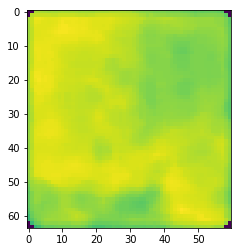

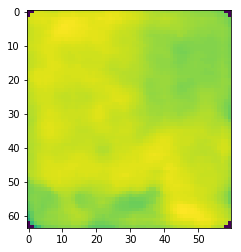

In [43]:
plt.imshow(m_subset[20])
plt.show()
plt.imshow(m_subset[80])
plt.show()
plt.imshow(hsp_color(m_subset))